# **Project Name** - **Book Recommendation System**



##### **Project Type**   - Unsupervised Machine Learning
##### **Contribution**   - Individual
##### **Riya Rastogi**


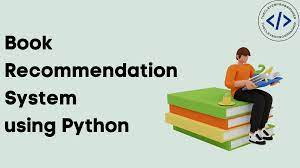


# **Project Summary -**

Book recommendation system is a system that suggests books to users based on their interests and preferences. These systems are commonly used by online bookstores, libraries, and reading apps to help users discover new books and authors. There are several approaches to building a book recommendation system. One common approach is to use collaborative filtering, which involves analyzing the reading patterns and preferences of a group of users and making recommendations based on what similar users have enjoyed. Another approach is to use content-based filtering, which involves analyzing the characteristics of a book (such as its genre, author, and subject matter) and making recommendations based on how closely they match the user's interests.

In this project, building a book recommendation system using one or more of these approaches, need to gather a dataset of books and user ratings, and then use machine learning algorithms to build a model that can make recommendations. You may also need to design a user interface for your system, so that users can easily interact with it and receive recommendations. Overall, this project will involve a combination of data gathering, data analysis, and development skills, and will give the opportunity to apply knowledge of machine learning and recommendation systems in a practical context.

Approach 1

**Popularity based Approach**:The main idea behind Popularity Based Approach is to recomend the books which are popular, the popularity can be calculated on the basis of ratings.

Approach 2

**Collaborative Filtering Approaches**:In Collaborative Filtering we make predictions of the taste or the interests of the user based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 have similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books.

Collaborative Filtering has mainly two implimentaion strategies

Model Based

Memory Based

we will use following approaches

User_based Collaborative Filtering
and
Item_based Collaborative Filtering

Approach 3

**Content based filtering**:Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

Singular value decomposition(SVD)

Non-Negetive Matrix Factorisation(NMF)



# **GitHub Link -**

# **Problem Statement**


A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc So, this project aims to recommend books to users according to their preferences and taste in reading books.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
books =pd.read_csv('/content/drive/MyDrive/Book_Recommend_system/Books.csv')
users=pd.read_csv('/content/drive/MyDrive/Book_Recommend_system/Users.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Book_Recommend_system/Ratings.csv')

In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


#### **Data Description**
The Book-Crossing dataset comprises 3 files.

● Books loaded as books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Users loaded as users

Contains the users. Note that user IDs ( ) have been anonymized and map to integers. Demographic data is provided ( , Age) if available. Otherwise, these fields contain NULL values.


● Ratings loaded as ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Dataset First View

In [ ]:
#first five rows of books data
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#last five rows of books data
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
# first five rows of users data
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#last five rows of users data
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
#first five rows of ratings data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#last five rows of ratings data
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
books.shape,users.shape,ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

### Dataset Information

In [ ]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
#function computes various summary statistics for each numeric column
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

### Variables Description

**Column information for Books data set**

ISBN (It is the unique number for different books)

Book-Title (It is the title of the books)

Book-Author (The author of the book)

Year-Of-Publication (It is the year when book was published)

Publisher (It is the name of the publisher)

Image-URL-S (It is URL of the books categorizing it as small)

Image-URL-M (It is URL of the books categorizing it as medium)

Image-URL-L (It is URL of the books categorizing it as large)

**Columns present in the user dataset:**

User-ID: Unique ID of the user

Location: Location of the user

Age: Age of the user

**Columns present in the ratings dataset: User-ID: Unique ID of the user**

ISBN: Unique ID to identify a book

Book-Rating: Ratings of the book (In the range of 0-10)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in books.columns:
  print(f"Unique values in {i} in books dataset")
  print(books[i].unique())
  print('______'*25)
  print(f"Unique value count in {i} in books dataset")
  print(books[i].value_counts())
  print('______'*25)
  print('______'*25)

Unique values in ISBN in books dataset
['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']
______________________________________________________________________________________________________________________________________________________
Unique value count in ISBN in books dataset
0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
             ..
1568303823    1
0525947612    1
207036819X    1
2877306127    1
0767409752    1
Name: ISBN, Length: 271360, dtype: int64
______________________________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________________________
Unique values in Book-Title in books dataset
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks 

For book dataset:

 **Year of publication**: It contains values as 'DK Publishing Inc' and 'Gallimard' which seems to be incorrect therefore it is required to keep an eye on it.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# checking 'Year-Of-Publication' column is equal to 'DK Publishing Inc'.
books[books['Year-Of-Publication']== 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# Write your code to make your dataset analysis ready.
books['Book-Title'][books['Year-Of-Publication']== 'DK Publishing Inc']

209538    DK Readers: Creating the X-Men, How It All Beg...
221678    DK Readers: Creating the X-Men, How Comic Book...
Name: Book-Title, dtype: object

### What all manipulations have you done and insights you found?

In [ ]:
#here modify all the values
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = '2000'
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'
books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = '2000'
books.at[221687 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'

In [ ]:
#have a look at index 209538
books.loc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [ ]:
#have a look at index 221678
books.loc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

In [ ]:
# Lets check in how many rows are the year of publicatiobn as gallimard
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
# Write your code to make your dataset analysis ready.
books['Book-Title'][books['Year-Of-Publication']== 'Gallimard']

220731    Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Name: Book-Title, dtype: object

In [ ]:
# lets correct the values at index 220731
books.at[220731,'Book-Author']='Jean-Marie Gustave Le'
books.at[220731,'Book-Title']='Peuple du cel,suivi de les Bergers'
books.at[220731,'Publisher']='Gallimard'
books.at[220731,'Year-Of-Publication']='2003'

In [ ]:
books.loc[220731]

ISBN                                                          2070426769
Book-Title                            Peuple du cel,suivi de les Bergers
Book-Author                                        Jean-Marie Gustave Le
Year-Of-Publication                                                 2003
Publisher                                                      Gallimard
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

Answer Here.

In [ ]:
#since we are living in 2024 so we have to remove values in which the year of publication is greater than 2022.
# Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
books['Year-Of-Publication'].sort_values(ascending=False).unique()

array([2050, 2038, 2037, 2030, 2026, 2024, 2021, 2020, 2012, 2011, 2010,
       2008, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
       1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931,
       1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920,
       1919, 1917, 1914, 1911, 1910, 1909, 1908, 1906, 1904, 1902, 1901,
       1900, 1897, 1806, 1378, 1376,    0])

In [ ]:
books[books['Year-Of-Publication']>=2023]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


In [ ]:
# lets see the Year of publication which is 0
books.loc[books['Year-Of-Publication']==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [ ]:
#Replacing incorrect publication year by mode i.e 2002
books.loc[books['Year-Of-Publication']>=2023,'Year-Of-Publication']=2002
books.loc[books['Year-Of-Publication']==0,'Year-Of-Publication']=2002

In [ ]:
#Checking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [ ]:
books['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102022, dtype: int64

In [ ]:
#records containg Downes in author name
mask=books['Book-Author'].str.contains('Downes',case=False,na=False)

In [ ]:
books[mask]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
9300,0789426323,The Starlight Princess and Other Princess Stories,Belinda Downes,1999,DK Ink,http://images.amazon.com/images/P/0789426323.0...,http://images.amazon.com/images/P/0789426323.0...,http://images.amazon.com/images/P/0789426323.0...
41756,087584801X,Unleashing the Killer App: Digital Strategies ...,Larry Downes,1998,Harvard Business School Press,http://images.amazon.com/images/P/087584801X.0...,http://images.amazon.com/images/P/087584801X.0...,http://images.amazon.com/images/P/087584801X.0...
104999,0812025229,Dictionary of finance and investment terms (Ba...,John Downes,1985,Barron's,http://images.amazon.com/images/P/0812025229.0...,http://images.amazon.com/images/P/0812025229.0...,http://images.amazon.com/images/P/0812025229.0...
166910,1578512611,Unleashing the Killer App: Digital Strategies ...,Larry Downes,2000,Harvard Business School Press,http://images.amazon.com/images/P/1578512611.0...,http://images.amazon.com/images/P/1578512611.0...,http://images.amazon.com/images/P/1578512611.0...
215606,078684440X,102 Dalmatians,Alice Downes,2000,Disney Pr,http://images.amazon.com/images/P/078684440X.0...,http://images.amazon.com/images/P/078684440X.0...,http://images.amazon.com/images/P/078684440X.0...
217668,0553218425,Evenings in Paris,Kathleen Downes,1987,Loveswept,http://images.amazon.com/images/P/0553218425.0...,http://images.amazon.com/images/P/0553218425.0...,http://images.amazon.com/images/P/0553218425.0...
222654,0066211298,The Strategy Machine: Building Your Business O...,Larry Downes,2002,HarperBusiness,http://images.amazon.com/images/P/0066211298.0...,http://images.amazon.com/images/P/0066211298.0...,http://images.amazon.com/images/P/0066211298.0...
242588,0071396683,Teach Yourself 101 Key Ideas Literature (Teach...,Brenda Downes,2002,McGraw-Hill,http://images.amazon.com/images/P/0071396683.0...,http://images.amazon.com/images/P/0071396683.0...,http://images.amazon.com/images/P/0071396683.0...
261979,0802705405,The New York Philharmonic Guide to the Symphony,Edward Downes,1976,Walker &amp; Company,http://images.amazon.com/images/P/0802705405.0...,http://images.amazon.com/images/P/0802705405.0...,http://images.amazon.com/images/P/0802705405.0...
270443,1898941750,The Devil Drives a Jaguar,Suzanne Downes,2002,Country Books,http://images.amazon.com/images/P/1898941750.0...,http://images.amazon.com/images/P/1898941750.0...,http://images.amazon.com/images/P/1898941750.0...


None of the record contains Downes Larissa Anne as a author name

In [ ]:
books.at[187689,'Book-Author']='Downes Larissa Anne'

In [ ]:
books.loc[187689]

ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                          Downes Larissa Anne
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object

In [ ]:
# checking null values in Publisher column
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [ ]:
mask=books['Publisher'].str.contains('Novelbooks',case=False,na=False)

In [ ]:
books[mask]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
126169,1591051827,The Guarder Factor,Shawn P. Madison,2003,"NovelBooks, Inc.",http://images.amazon.com/images/P/1591051827.0...,http://images.amazon.com/images/P/1591051827.0...,http://images.amazon.com/images/P/1591051827.0...
126707,1591051894,Sorrows of Adoration,Kimberly Chapman,2003,"NovelBooks, Inc.",http://images.amazon.com/images/P/1591051894.0...,http://images.amazon.com/images/P/1591051894.0...,http://images.amazon.com/images/P/1591051894.0...
126708,1591051401,Angels on Crusade,Jennifer Macaire,2003,"NovelBooks, Inc",http://images.amazon.com/images/P/1591051401.0...,http://images.amazon.com/images/P/1591051401.0...,http://images.amazon.com/images/P/1591051401.0...
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
127002,1591051363,Beyond Those Distant Stars,John B. Rosenman,2003,Novelbooks,http://images.amazon.com/images/P/1591051363.0...,http://images.amazon.com/images/P/1591051363.0...,http://images.amazon.com/images/P/1591051363.0...
127005,159105236X,The Starry Child,Lynn Hanna,2003,Novelbooks,http://images.amazon.com/images/P/159105236X.0...,http://images.amazon.com/images/P/159105236X.0...,http://images.amazon.com/images/P/159105236X.0...
127279,1591051266,The Best Defense,Todd Stone,2003,Novelbooks,http://images.amazon.com/images/P/1591051266.0...,http://images.amazon.com/images/P/1591051266.0...,http://images.amazon.com/images/P/1591051266.0...
127548,1591051428,Dangerous Medicine,Jane Toombs,2003,Novelbooks,http://images.amazon.com/images/P/1591051428.0...,http://images.amazon.com/images/P/1591051428.0...,http://images.amazon.com/images/P/1591051428.0...
128078,1931696861,"The Binding (Sylvan Wars Saga, Book 1)",PhyllisAnn Welsh,2001,Novelbooks,http://images.amazon.com/images/P/1931696861.0...,http://images.amazon.com/images/P/1931696861.0...,http://images.amazon.com/images/P/1931696861.0...
128079,1931696772,"The Choosing (The Sylvan Wars Saga, Book 2)",Phyllis Ann Welsh,2002,Novelbooks,http://images.amazon.com/images/P/1931696772.0...,http://images.amazon.com/images/P/1931696772.0...,http://images.amazon.com/images/P/1931696772.0...


In [ ]:
mask=books['Publisher'].str.contains('Simon',case=False,na=False)

In [ ]:
books[mask]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
84,0743403843,Decipher,Stel Pavlou,2002,Simon &amp; Schuster (Trade Division),http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...
170,0671504282,LAW OF THE JUNGLE (HARDY BOYS CASE FILE 105) :...,Franklin W. Dixon,1995,Simon Pulse,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...
292,0684833395,Catch 22,Joseph Heller,1996,Simon &amp; Schuster,http://images.amazon.com/images/P/0684833395.0...,http://images.amazon.com/images/P/0684833395.0...,http://images.amazon.com/images/P/0684833395.0...
494,0020199090,Joshua In the Holy Land,Joseph Girzone,1993,Simon Schuster Trade,http://images.amazon.com/images/P/0020199090.0...,http://images.amazon.com/images/P/0020199090.0...,http://images.amazon.com/images/P/0020199090.0...
505,0684854953,Santa Pete : A Novel Of Christmas Present And ...,Christopher Moore,1998,Simon &amp; Schuster,http://images.amazon.com/images/P/0684854953.0...,http://images.amazon.com/images/P/0684854953.0...,http://images.amazon.com/images/P/0684854953.0...
...,...,...,...,...,...,...,...,...
271029,0671516760,My Story,Sarah Duchess of York,1997,Simon &amp; Schuster (Trade Division),http://images.amazon.com/images/P/0671516760.0...,http://images.amazon.com/images/P/0671516760.0...,http://images.amazon.com/images/P/0671516760.0...
271202,0689869991,Sunlight and Shadow (Once Upon a Time),Cameron Dokey,2004,Simon Pulse,http://images.amazon.com/images/P/0689869991.0...,http://images.amazon.com/images/P/0689869991.0...,http://images.amazon.com/images/P/0689869991.0...
271258,0684857502,TEXASVILLE : A Novel,Larry McMurtry,1999,Simon &amp; Schuster,http://images.amazon.com/images/P/0684857502.0...,http://images.amazon.com/images/P/0684857502.0...,http://images.amazon.com/images/P/0684857502.0...
271312,0671015885,Star Trek: First Contact (Star Trek),J.M. Dillard,1997,Simon &amp; Schuster (Trade Division),http://images.amazon.com/images/P/0671015885.0...,http://images.amazon.com/images/P/0671015885.0...,http://images.amazon.com/images/P/0671015885.0...


In [ ]:
 books.at[128890,'Publisher']='NovelBooks, Inc.'
 books.at[129037,'Publisher']='Simon &amp; Schuster'

In [ ]:
# checking null value in Image-URL-L column
books.loc[books['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du cel,suivi de les Bergers",Jean-Marie Gustave Le,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
books.at[209538,'Image-URL-L']='https://m.media-amazon.com/images/I/51HR6W22SFL._SX312_BO1,204,203,200_.jpg'
books.at[220731,'Image-URL-L']='https://books.google.co.in/books/content?id=O-SrPQAACAAJ&printsec=frontcover&img=1&zoom=1&imgtk=AFLRE70uA-IF8I7lU89Ksou-kxhY4ZKzeHbbaRTqLfl8f05OWc0pRS3Ct43gYUhz_xEu6ThzaVcAHe2NXwmFs3xuYTzg4G5JiXhvuLkmWv_N2QjppZ2hPUmDR7FMrUufn2bHxH364UFR'
books.at[221678,'Image-URL-L']='https://m.media-amazon.com/images/I/51Z5YNCMB8L.jpg'

In [ ]:
# Lets check is there any Duplicate values
books.duplicated().any()


False

In [ ]:
# lets check is there any null values
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB



Now Its time for Users Data set

In [ ]:
#checking unique values of different features of the user dataset
users.apply(lambda x: len(x.unique()))

User-ID     278858
Location     57339
Age            166
dtype: int64

In [ ]:
users.rename(columns={'User-ID':'user_id'},inplace=True)


In [ ]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

There is nan values and some values are there which could not be there in dataset such as age greater than 90 and less than 6 because peoples greater than 90 and less 6 years of age do not read books.So we have to remove these values.

In [ ]:
# lets check how many values are less than or equal to 6 years and greater than 90
users[(users['Age']<6) | (users['Age']>90)]


,user_id,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0
...,...,...,...
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0
277558,277559,"lake george, new york, usa",98.0
277908,277909,"phoenix, arizona, usa",2.0


Hence there are 1338 such records

In [ ]:
# lets create a variable for required age group
required = users[(users['Age'] <= 90) | (users['Age'] >=6)]

In [ ]:
# lets check the mean age
mean = round(required['Age'].mean())
mean

35

In [ ]:
# lets find unique values in location column
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
# lets find out total unique values in location column
users.Location.nunique()

57339

In [ ]:
def country(string):
  '''
  It returns the country from the location of the user
  '''
  country = string.rpartition(' ')[-1]
  if country=='zealand':
    return 'new zealand'
  elif country=='kingdom':
    return 'united kingdom'

  else:
    return country

In [ ]:
users['Country'] = users['Location'].apply(country)

In [ ]:
users["Country"]=users["Country"].replace('[",,,.,-]','',regex=True)

In [ ]:
users["Country"].value_counts().head(10)

usa               139717
canada             21662
united kingdom     18539
germany            17075
spain              13262
australia          11793
italy              11276
france              3526
portugal            3391
new zealand         3097
Name: Country, dtype: int64

In [ ]:
users.head()

,user_id,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


Rating Dataset

In [ ]:
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'Rating'}, inplace = True)

In [ ]:
ratings.columns

Index(['user_id', 'ISBN', 'Rating'], dtype='object')

In [ ]:
# Creating a dataframe by merging books and ratings dataframe

books_ratings_df = books.merge(ratings, on='ISBN')

In [ ]:
print(books_ratings_df.shape)
books_ratings_df.head()

(1031136, 10)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user_id,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [ ]:
# Groupby on book title by counting the number of ratings
num_rating_book_df = books_ratings_df.groupby('Book-Title')['Rating'].count().reset_index()
# Renaming the column of the dataframe
num_rating_book_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_book_df.head()

,Book-Title,Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
# Groupby on book title by taking the ratings average
avg_rating_book_df = books_ratings_df.groupby('Book-Title').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_book_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_book_df.head()

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [ ]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_books_df = num_rating_book_df.merge(avg_rating_book_df, on='Book-Title')

# Printing the first 5 rows of the dataframe
popular_books_df.head()

,Book-Title,Rating,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [ ]:
# Selecting the books which have received ratings 200 and above and arranging the average ratings in descending order
popular_books_df = popular_books_df[popular_books_df['Rating']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular books on the basis of ratings
popular_books_df

,Book-Title,Rating,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60583,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [ ]:
# Getting all the details of the top 10 most popular books

popular_books_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,Rating,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,0312853238,Orson Scott Card,1992,Tor Books,http://images.amazon.com/images/P/0312853238.0...,http://images.amazon.com/images/P/0312853238.0...,http://images.amazon.com/images/P/0312853238.0...
17,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
20,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
21,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
30,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
32,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...


In [ ]:
# Groupby on book author by counting the number of ratings
num_rating_author_df = books_ratings_df.groupby('Book-Author').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_author_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_author_df.head()

,Book-Author,num_ratings
0,D. Chiel,4
1,J. D. Landis,1
2,Mimma Balia,1
3,'N Sync,1
4,142 moms from all over the world,1


In [ ]:
# Groupby on book author by taking the ratings average
avg_rating_author_df = books_ratings_df.groupby('Book-Author').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_author_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_author_df.head()

,Book-Author,avg_ratings
0,D. Chiel,2.5
1,J. D. Landis,0.0
2,Mimma Balia,8.0
3,'N Sync,0.0
4,142 moms from all over the world,5.0


In [ ]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_authors_df = num_rating_author_df.merge(avg_rating_author_df, on='Book-Author')

# Printing the first 5 rows of the dataframe
popular_authors_df.head()

,Book-Author,num_ratings,avg_ratings
0,D. Chiel,4,2.5
1,J. D. Landis,1,0.0
2,Mimma Balia,1,8.0
3,'N Sync,1,0.0
4,142 moms from all over the world,1,5.0


In [ ]:
# Selecting the authors who have received ratings 200 and above and arranging the average ratings in descending order
popular_authors_df = popular_authors_df[popular_authors_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular authors on the basis of ratings
popular_authors_df

,Book-Author,num_ratings,avg_ratings
9640,Bill Watterson,550,5.561818
5678,Antoine de Saint-ExupÃ©ry,278,5.553957
40388,J. K. Rowling,2908,5.385832
72430,Nick Bantock,270,5.292593
40547,J. R. R. Tolkien,978,5.165644
24643,Dr. Seuss,371,5.121294
19166,Daniel Quinn,264,5.045455
36574,Harper Lee,534,4.728464
40805,J.R.R. Tolkien,285,4.694737
56653,LOIS LOWRY,310,4.638710


In [ ]:
# Getting all the details of the top 10 most popular authors

popular_authors_df.merge(books, on='Book-Author').drop_duplicates('Book-Author')

,Book-Author,num_ratings,avg_ratings,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Bill Watterson,550,5.561818,0836218256,Something Under the Bed Is Drooling,1988,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218256.0...,http://images.amazon.com/images/P/0836218256.0...,http://images.amazon.com/images/P/0836218256.0...
42,Antoine de Saint-ExupÃ©ry,278,5.553957,0156528207,The Little Prince,1968,Harcourt,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...
63,J. K. Rowling,2908,5.385832,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
141,Nick Bantock,270,5.292593,0811802981,The Golden Mean: In Which the Extraordinary Co...,1993,Chronicle Books,http://images.amazon.com/images/P/0811802981.0...,http://images.amazon.com/images/P/0811802981.0...,http://images.amazon.com/images/P/0811802981.0...
159,J. R. R. Tolkien,978,5.165644,8445071408,El Senor De Los Anillos: LA Comunidad Del Anil...,2001,Minotauro,http://images.amazon.com/images/P/8445071408.0...,http://images.amazon.com/images/P/8445071408.0...,http://images.amazon.com/images/P/8445071408.0...
333,Dr. Seuss,371,5.121294,039480001X,The Cat in the Hat,1957,Random House Books for Young Readers,http://images.amazon.com/images/P/039480001X.0...,http://images.amazon.com/images/P/039480001X.0...,http://images.amazon.com/images/P/039480001X.0...
373,Daniel Quinn,264,5.045455,0553375407,Ishmael: An Adventure of the Mind and Spirit,1995,Bantam,http://images.amazon.com/images/P/0553375407.0...,http://images.amazon.com/images/P/0553375407.0...,http://images.amazon.com/images/P/0553375407.0...
392,Harper Lee,534,4.728464,0446310786,To Kill a Mockingbird,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
407,J.R.R. Tolkien,285,4.694737,0618126988,The Silmarillion,2001,Houghton Mifflin,http://images.amazon.com/images/P/0618126988.0...,http://images.amazon.com/images/P/0618126988.0...,http://images.amazon.com/images/P/0618126988.0...
453,LOIS LOWRY,310,4.638710,0440219078,The Giver (21st Century Reference),1994,Laure Leaf,http://images.amazon.com/images/P/0440219078.0...,http://images.amazon.com/images/P/0440219078.0...,http://images.amazon.com/images/P/0440219078.0...


### Top 10 most popular publishers on the basis of ratings

In [ ]:
# Groupby on book publisher by counting the number of ratings
num_rating_pub_df = books_ratings_df.groupby('Publisher').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_pub_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_pub_df.head()

,Publisher,num_ratings
0,Editions P. Terrail,1
1,Tri-State Press,1
2,'K' Pub,1
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1
4,"(49 Poland St., W.1), BPC Unit 75",1


In [ ]:
# Groupby on book publisher by taking the ratings average
avg_rating_pub_df = books_ratings_df.groupby('Publisher').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_pub_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_pub_df.head()

,Publisher,avg_ratings
0,Editions P. Terrail,10.0
1,Tri-State Press,6.0
2,'K' Pub,8.0
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",0.0
4,"(49 Poland St., W.1), BPC Unit 75",0.0


In [ ]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_publishers_df = num_rating_pub_df.merge(avg_rating_pub_df, on='Publisher')

# Printing the first 5 rows of the dataframe
popular_publishers_df.head()

,Publisher,num_ratings,avg_ratings
0,Editions P. Terrail,1,10.0
1,Tri-State Press,1,6.0
2,'K' Pub,1,8.0
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1,0.0
4,"(49 Poland St., W.1), BPC Unit 75",1,0.0


In [ ]:
# Selecting the publishers who have received ratings 200 and above and arranging the average ratings in descending order
popular_publishers_df = popular_publishers_df[popular_publishers_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular publishers on the basis of ratings
popular_publishers_df

,Publisher,num_ratings,avg_ratings
5400,Five Star (ME),207,7.884058
14873,TokyoPop,205,6.570732
14874,Tokyopop,310,6.277419
3725,DC Comics,529,5.913043
1201,Authorhouse,224,5.285714
15089,Tusquets,274,4.861314
1008,Arthur A. Levine Books,629,4.786963
758,Andrews McMeel Publishing,2589,4.685207
2808,Celestial Arts,247,4.672065
16444,Writers Club Press,293,4.668942


In [ ]:
# Getting all the details of the top 10 most popular publishers

popular_publishers_df.merge(books, on='Publisher').drop_duplicates('Publisher')

,Publisher,num_ratings,avg_ratings,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S,Image-URL-M,Image-URL-L
0,Five Star (ME),207,7.884058,1594140812,Becoming Maren,Africa Fine,2003,http://images.amazon.com/images/P/1594140812.0...,http://images.amazon.com/images/P/1594140812.0...,http://images.amazon.com/images/P/1594140812.0...
183,TokyoPop,205,6.570732,1591822580,Chobits (Chobits),Clamp,2003,http://images.amazon.com/images/P/1591822580.0...,http://images.amazon.com/images/P/1591822580.0...,http://images.amazon.com/images/P/1591822580.0...
285,Tokyopop,310,6.277419,1591824095,"Chobits, Book 8",Clamp,2003,http://images.amazon.com/images/P/1591824095.0...,http://images.amazon.com/images/P/1591824095.0...,http://images.amazon.com/images/P/1591824095.0...
427,DC Comics,529,5.913043,1401201172,"League of Extraordinary Gentlemen, Vol. 2 (Comic)",Alan Moore,2003,http://images.amazon.com/images/P/1401201172.0...,http://images.amazon.com/images/P/1401201172.0...,http://images.amazon.com/images/P/1401201172.0...
584,Authorhouse,224,5.285714,1418447293,The Thoughts of an Emigrant,Albert Schwarzenbach,2004,http://images.amazon.com/images/P/1418447293.0...,http://images.amazon.com/images/P/1418447293.0...,http://images.amazon.com/images/P/1418447293.0...
741,Tusquets,274,4.861314,8472238822,Tu Nombre Escrito En El Agua (La Sonrisa Verti...,Irene Gonzalez Frei,2002,http://images.amazon.com/images/P/8472238822.0...,http://images.amazon.com/images/P/8472238822.0...,http://images.amazon.com/images/P/8472238822.0...
903,Arthur A. Levine Books,629,4.786963,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
923,Andrews McMeel Publishing,2589,4.685207,0740700235,Life Messages: Inspiration For The Woman's Spirit,Josephine Carlton,2002,http://images.amazon.com/images/P/0740700235.0...,http://images.amazon.com/images/P/0740700235.0...,http://images.amazon.com/images/P/0740700235.0...
1490,Celestial Arts,247,4.672065,0890877564,Totally Muffins Cookbook (Totally Cookbooks),Helene Siegel,1995,http://images.amazon.com/images/P/0890877564.0...,http://images.amazon.com/images/P/0890877564.0...,http://images.amazon.com/images/P/0890877564.0...
1604,Writers Club Press,293,4.668942,0595168442,Cigar Box,Wilbur Witt,2001,http://images.amazon.com/images/P/0595168442.0...,http://images.amazon.com/images/P/0595168442.0...,http://images.amazon.com/images/P/0595168442.0...











## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Creating a dataframe of authors having written maximum number of books
top_authors = pd.DataFrame(books['Book-Author'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_authors.rename(columns = {'index':'Author', 'Book-Author':'Count'}, inplace = True)

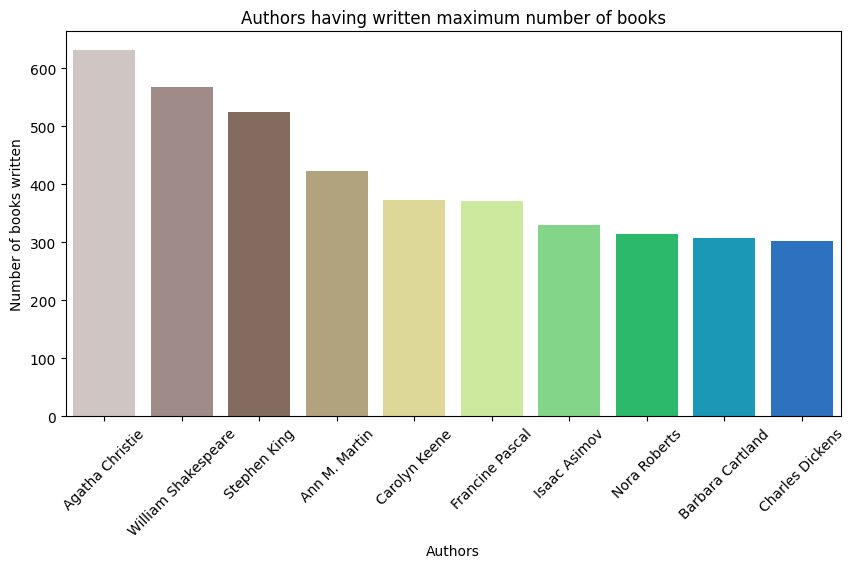

In [ ]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x = 'Author', y = 'Count', data = top_authors, palette="terrain_r")

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Authors having written maximum number of books')
figure.set(xlabel='Authors', ylabel='Number of books written')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 authors who have written maximum number of books.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we found out that Agatha Christie have written maximum number of books followed by William Shakespeare and Stephen King.



#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Creating a dataframe of years in which maximum number of books were published
top_years = pd.DataFrame(books['Year-Of-Publication'].value_counts().head(10)).reset_index()

# Renaming the columns of the dataframe
top_years.rename(columns = {'index':'publication_year', 'Year-Of-Publication':'Count'}, inplace=True)

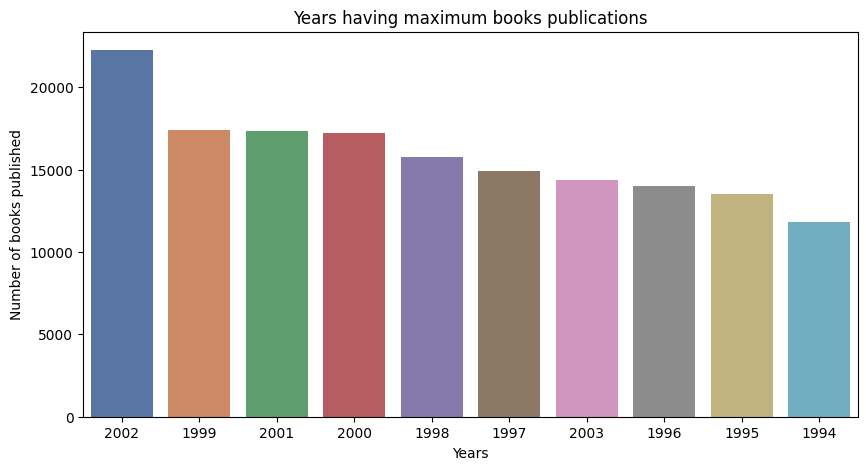

In [ ]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='publication_year', y='Count', data=top_years, order=top_years.sort_values('Count', ascending=False).publication_year,palette="deep")

# Defining the title, xticks rotation and x and y labels
figure.set(title='Years having maximum books publications')
figure.set(xlabel='Years', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 years in which maximum number of books were published.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we found out that 2002, 2001 and 1999 are the top years in which maximum number of books were published

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Creating a dataframe of publishers having published maximum number of books
top_publishers = pd.DataFrame(books['Publisher'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_publishers.rename(columns = {'index':'Publisher', 'Publisher':'Count'}, inplace=True)

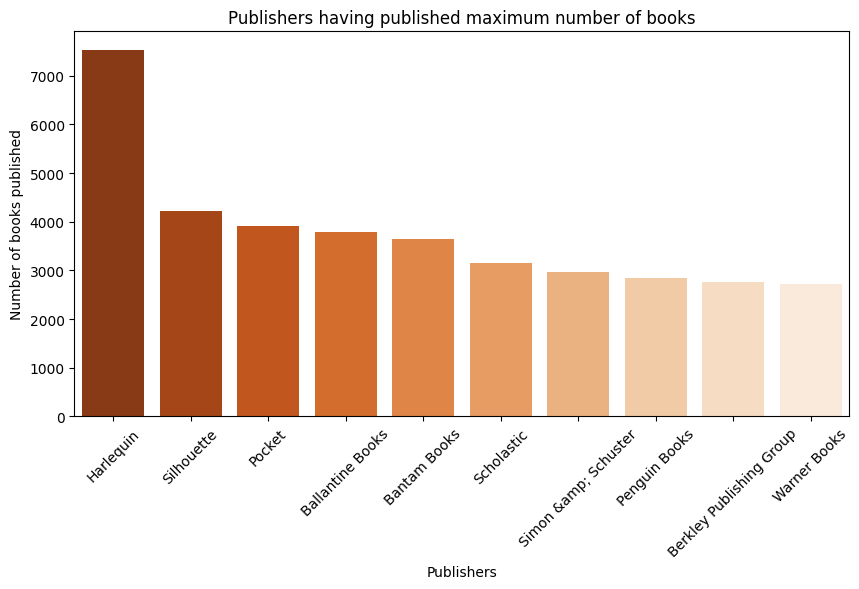

In [ ]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='Publisher', y='Count', data=top_publishers,palette="Oranges_r")

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Publishers having published maximum number of books')
figure.set(xlabel='Publishers', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 publishers who have published maximum number of books.

##### 2. What is/are the insight(s) found from the chart?

Harlequin published maximum number of books.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Creating a dataframe of the titles repeated maximum number of times
top_titles = pd.DataFrame(books['Book-Title'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_titles.rename(columns = {'index':'Book-Title', 'Book-Title':'Count'}, inplace = True)

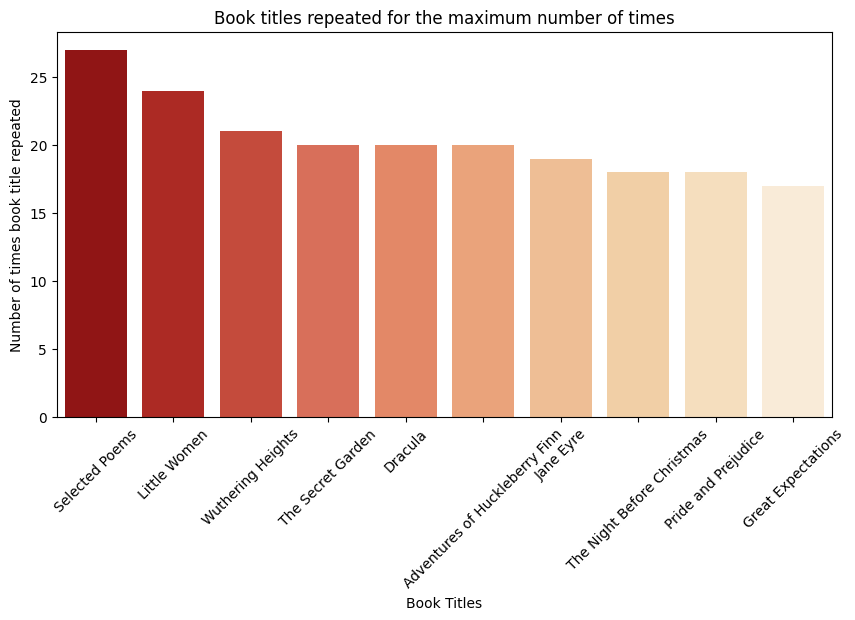

In [ ]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x = 'Book-Title', y = 'Count', data = top_titles, palette="OrRd_r")

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Book titles repeated for the maximum number of times')
figure.set(xlabel='Book Titles', ylabel='Number of times book title repeated')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 titles of the books repeated for maximum number of times

##### 2. What is/are the insight(s) found from the chart?

Selected Poems are the most frequent title of the books.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Creating a dataframe of the countries where maximum number of users are based
top_countries = pd.DataFrame(users['Country'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_countries.rename(columns = {'index':'Country', 'Country':'Count'}, inplace=True)

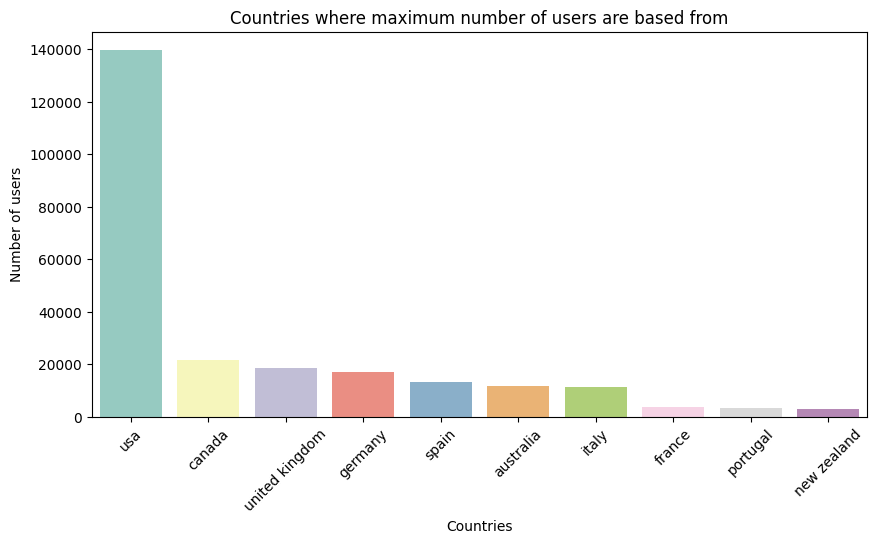

In [ ]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='Country', y='Count', data=top_countries, palette="Set3")

# Defining the title and x and y labels
figure.set(title='Countries where maximum number of users are based from')
figure.set(xlabel='Countries', ylabel='Number of users')
plt.xticks(rotation=45)

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 countries where maximum number of the users are based from.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of the users are from USA.

#### Chart - 6

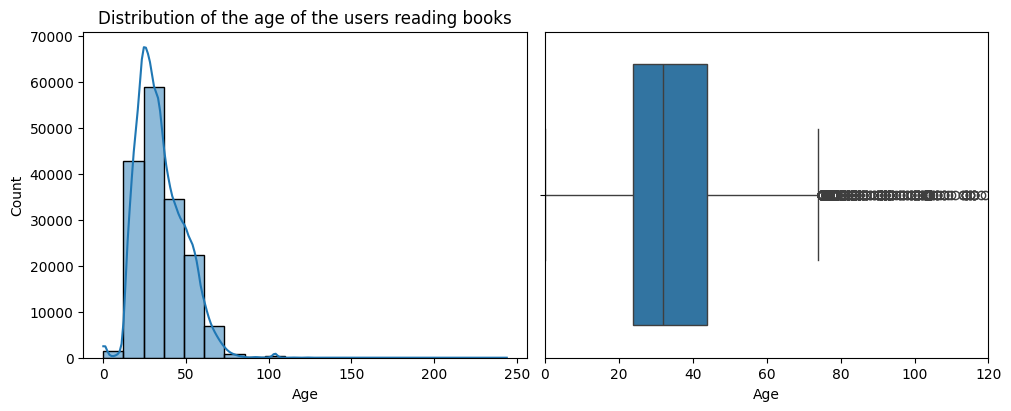

In [ ]:
# Chart - 6 visualization code
# Defining the plot size
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(10,4))

# Plotting a distribution plot

figure1 = sns.histplot(data=users['Age'],bins=20,kde=True,ax=axes[0])
# Defining the title and x and y labels
figure1.set(title='Distribution of the age of the users reading books')
figure1.set(xlabel='Age')

# Defining the x-axis data range
plt.xlim(0, 120)

#Plotting a boxplot
sns.boxplot(x='Age',data=users)

# Displaying the graph
plt.show()

##### 1. Why did you pick the specific chart?


To find distribution of the user's age reading books

##### 2. What is/are the insight(s) found from the chart?

Distribution of the user's age is positively skewed and have a lot of outliers, and it seems that user's age are fitted incorrectly in the dataset.

50% of data of user's age lies between 25 to 45.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Creating a dataframe of the users who have maximum number of times on the books
top_users = pd.DataFrame(ratings['user_id'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_users.rename(columns = {'index':'User-ID', 'user_id':'Count'}, inplace=True)

In [ ]:
top_users.head()

,User-ID,Count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850


In [ ]:
users.head()

,user_id,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


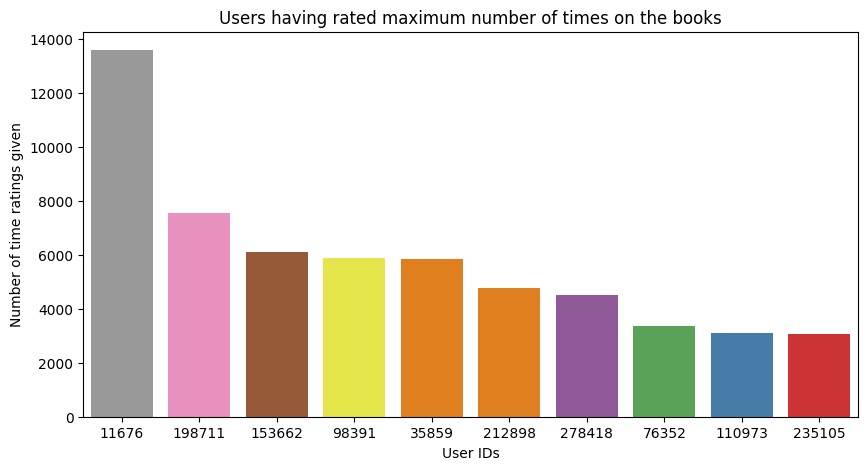

In [ ]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='User-ID', y='Count', data=top_users, order=top_users.sort_values('Count', ascending=False)['User-ID'], palette="Set1_r")

# Defining the title and x and y labels
figure.set(title='Users having rated maximum number of times on the books')
figure.set(xlabel='User IDs', ylabel='Number of time ratings given')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 users who have rated maximum number of times on the books

##### 2. What is/are the insight(s) found from the chart?

User with User ID 11676 is the most frequent book rater.

#### Chart - 8

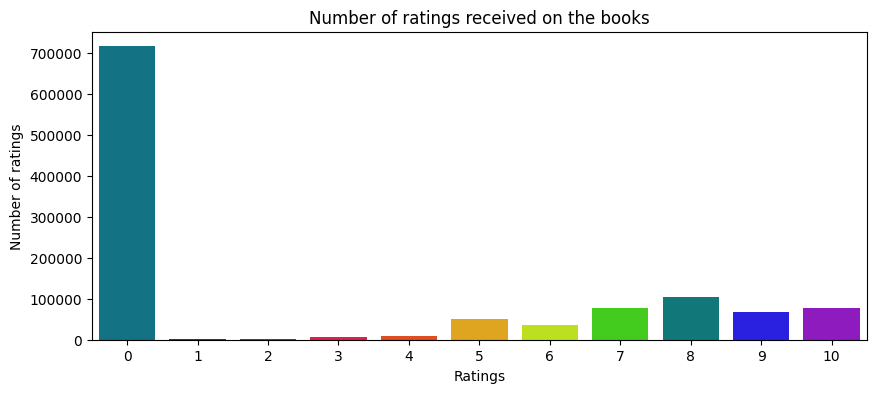

In [ ]:
# Chart - 8 visualization code
# Defining the plot size
plt.figure(figsize=(10,4))

# Plotting a bargraph
figure = sns.countplot(x=ratings['Rating'],palette="prism_r")

# Defining the title and x and y labels
figure.set(title='Number of ratings received on the books')
figure.set(xlabel='Ratings', ylabel='Number of ratings')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find the distibution of ratings received on the books.

##### 2. What is/are the insight(s) found from the chart?


0 is the most frequent rating received on the book, it is either received 0 rating or no rating by the user.

#### Chart - 9

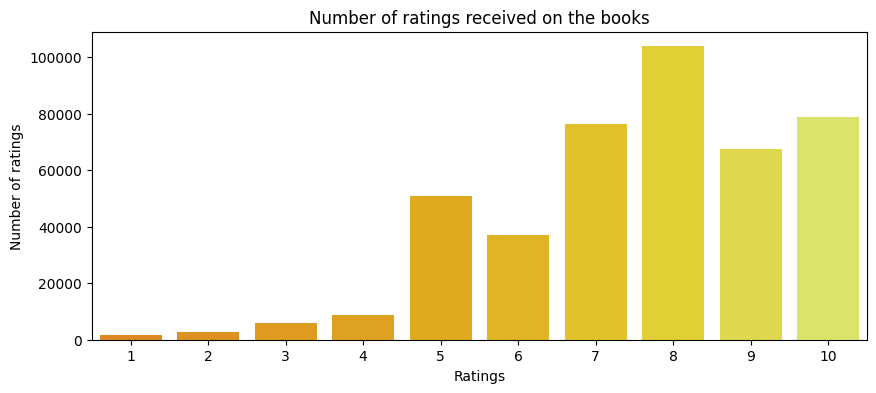

In [ ]:
# Chart - 9 visualization code
# Creating a dataframe with no 0 ratings
rating = ratings[ratings['Rating']!=0]

# Defining the plot size
plt.figure(figsize=(10,4))

# Plotting a bargraph
figure = sns.countplot(x = rating['Rating'], data=rating, palette="Wistia_r")

# Defining the title and x and y labels
figure.set(title='Number of ratings received on the books')
figure.set(xlabel='Ratings', ylabel='Number of ratings')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To Find the number of different ratings received on the books excluding 0 rating

##### 2. What is/are the insight(s) found from the chart?

After excluding 0 rating, 8 is the most frequent rating received on the books.

#### Chart - 10

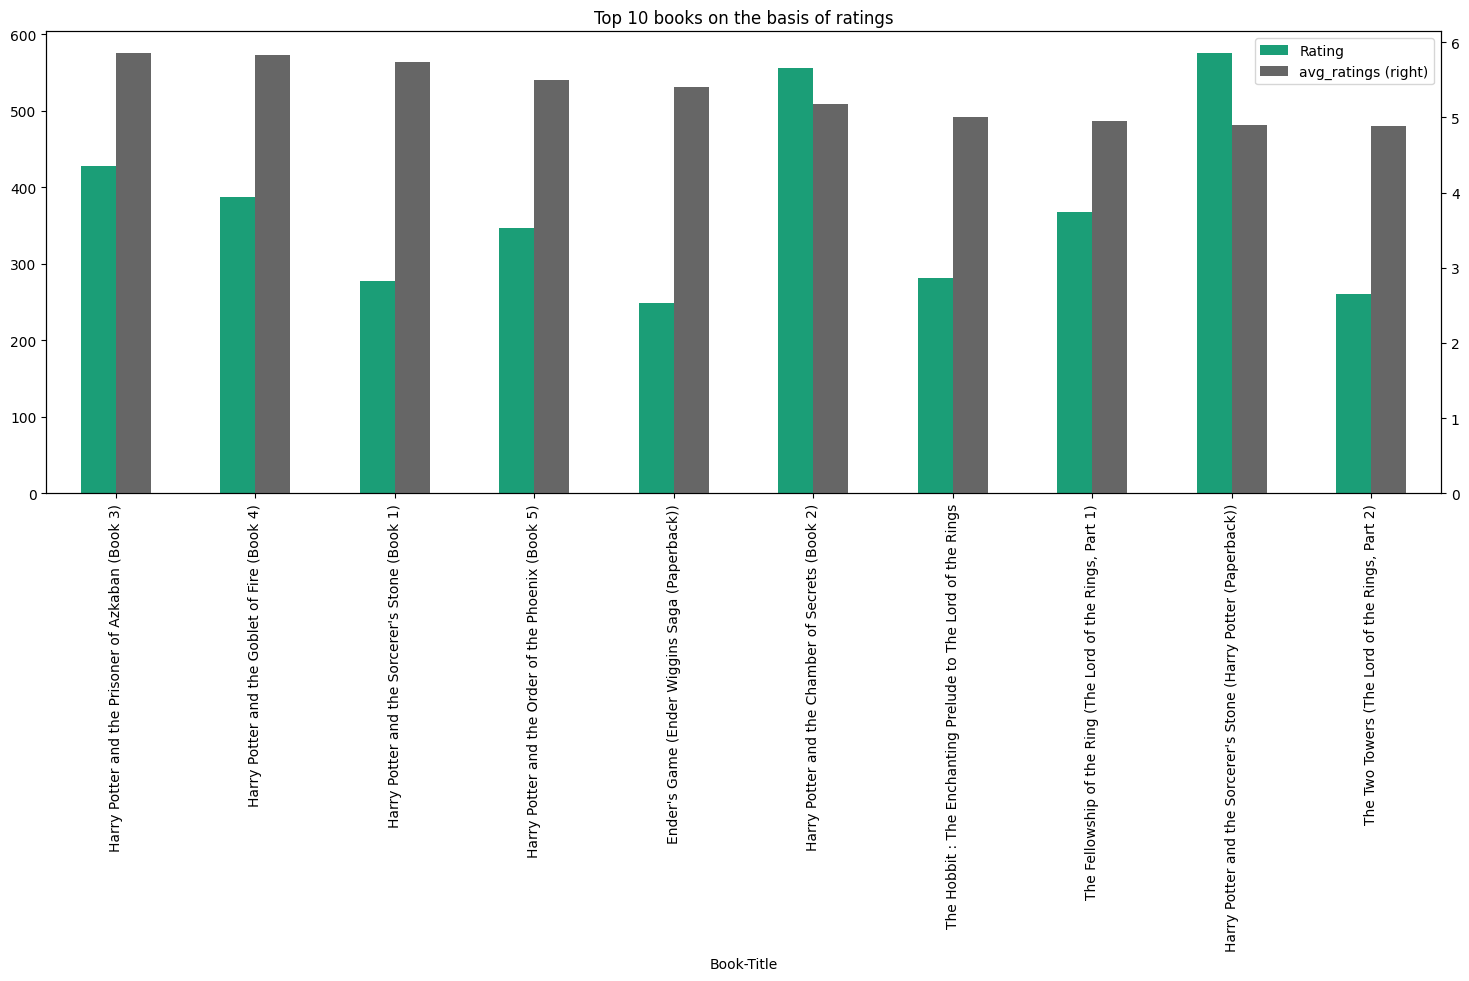

In [ ]:
# Chart - 10 visualization code
# Ploting the bargraph of the top 10 most popular books
popular_books_df.plot(x='Book-Title', title='Top 10 books on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(18,6),
                      secondary_y='avg_ratings')
plt.show()

##### 1. Why did you pick the specific chart?

To find the top 10 books on the basis of ratings.

##### 2. What is/are the insight(s) found from the chart?

The Book "Harry Potter and the Prisoner of Azkaban(Book 3)" has maximum Average rating and Number of rating are more 400.

#### Chart - 11

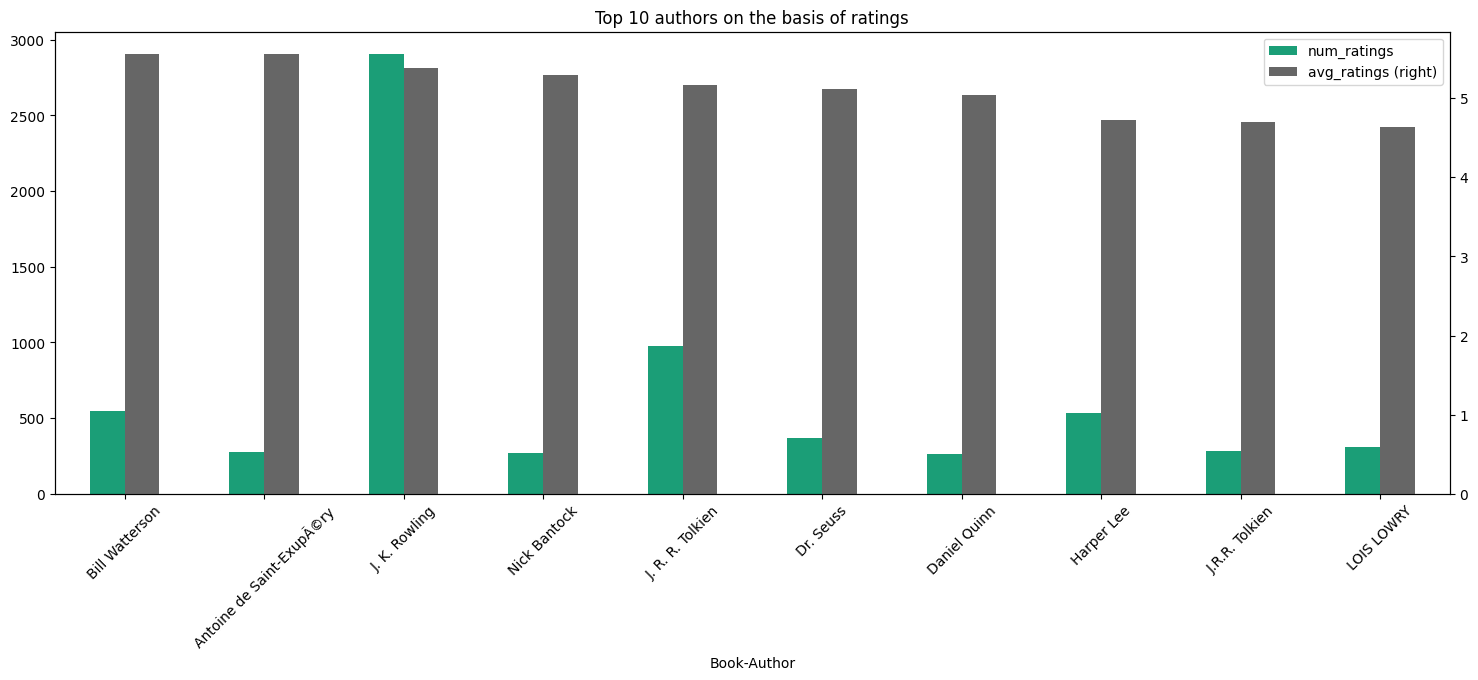

In [ ]:
# Chart - 11 visualization code
# Ploting the bargraph of the top 10 most popular authors

popular_authors_df.plot(x='Book-Author', title='Top 10 authors on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(18,6),
                      secondary_y='avg_ratings', rot=45)
plt.show()

##### 1. Why did you pick the specific chart?

To find the top 10 authors on the basis of ratings.

##### 2. What is/are the insight(s) found from the chart?

Author Bill Watterson has maximum average rating.

#### Chart - 12

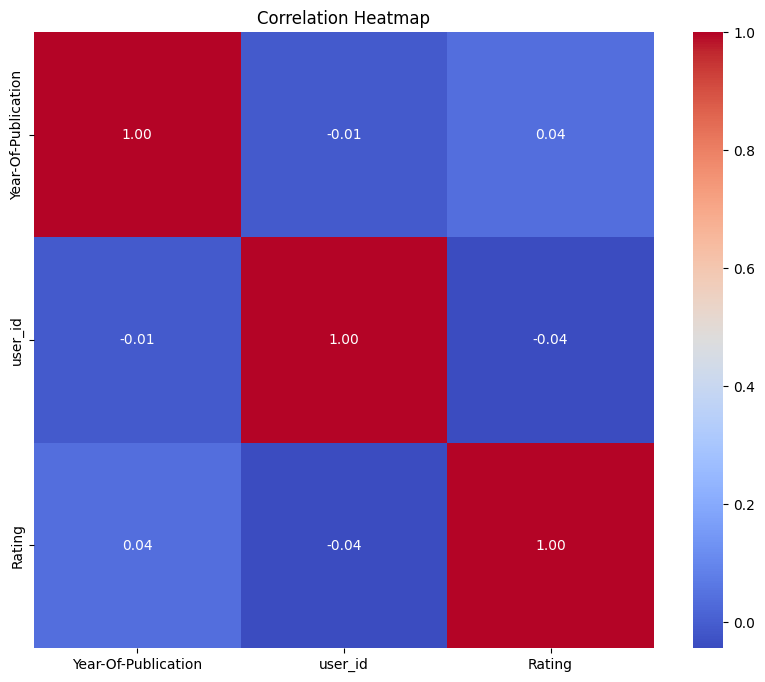

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = books_ratings_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?


The correlation heatmap was chosen because it provides a visual representation of the correlation between different numerical variables in the dataset, helping to identify relationships and patterns

##### 2. What is/are the insight(s) found from the chart?

Insight 1: Identify strong positive or negative correlations between variables.

Insight 2: Discover relationships between variables that may influence each other.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


Hypothesis 1 : Average rating by the user is 7.5

Hypothesis 2 : User's Age is distributed normally.

Hypothesis 3 : Median of production year is 2004.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average rating by the user is 7.5

Null Hypothesis H0 : ℳ = 7.5 , Mean rating is 7.5

Alternative Hypothesis H1 : ℳ != 7.5 , Mean rating is not 7.5

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy import stats
from scipy.stats import ttest_1samp

#let's take the sample mean and population mean
pop_mean = 3
sample = popular_books_df['Rating']
t_stat, p_value = ttest_1samp(sample, pop_mean)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

# criteria for null hypothesis to reject, Take level of significance(alpha) = 0.05
if p_value <= 0.05:
  print("Reject Null Hypothesis")
else :
  print(" Fail to reject Null hypothesis")

T-statistic value:  9.971477398715892
P-Value:  3.6643108645308443e-06
Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We chose t test for one sample (two-tailed test) to check if the average rating given by users is 7.5 or not.

##### Why did you choose the specific statistical test?

The one-sample t-test is a statistical hypothesis test used to determine whether an unknown population mean is different from a specific value, for our dataset unknown population mean is average user rating and specific value is 7.5.

**INFERENCE** : Since p_value obtained is less than level of significance (0.05). Hence we reject the null hypothesis and conclude that avergae rating given by users is not 7.5.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2 : User's Age is distributed normally.

Null Hypothesis H0 : User's Age has Gaussian distribution.

Alternative Hypothesis H1 : User's Age does not have Gaussian distribution.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import shapiro
sample = users["Age"]
stat, p_value = shapiro(sample)
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=nan, p_value=1.000
Probably Gaussian


##### Which statistical test have you done to obtain P-Value?


Here I have used Shapiro - Wilk test to check if Distribution of User's Age is distributed normally or not.







##### Why did you choose the specific statistical test?

Shapiro-Wilk Test is the appropriate test for testing the normality of data. it assumes that Observations in each sample are independent and identically distributed (iid).

INFERENCE : Since p value is 1.00 which is greater than level of significance 0.05, hence we fail to reject null hypothesis. And conclude that distribution of User's Age is probably normal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 3 : Median of production year is 2004.**

Null hypothesis H0 : Median of production year is 2004.

Alternative hypothesis H1 : Median of production year is not 2004.

In [ ]:
import numpy as np
from scipy.stats import wilcoxon as wil

# Convert "Year-Of-Publication" column to numeric data
books["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"], errors='coerce')

sample = np.array(books["Year-Of-Publication"].dropna())
med0 = 2004

W, p = wil(sample - med0, correction=False, mode='approx')

print("W = %.1f, p-value = %.3f" % (W, p))

W = 1856790.5, p-value = 0.000


We chose one-sample Wilcoxon signed rank test (two-tailed test) to check if the Median of production year is 2004 or not.

Why did you choose the specific statistical test?

One sample Wilcoxon Non Parametric Hypothesis Test is a rank-based test and it compares the standard value with a hypothesized median, for our dataset, unknown population median is Median production year and hypothesized median is 2004.

INFERENCE : Since p_value obtained is less than level of significance (0.05). Hence we reject the null hypothesis and conclude that median production year is not 2004.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# fill null values of the age column of users data as age contains outliers so we can use median
users["Age"].fillna(users.Age.median(),inplace=True)

In [ ]:
# filling the null values with median values as there are outliers in Publication Year column
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [ ]:
# filling null values for the column Author and Publisher
# as we have only very few null values 1 and 2 only so we act fill those values with other
books["Book-Author"].fillna("other", inplace = True)
books["Publisher"].fillna("other", inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Fill the missing values with median since the column contain outilers.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
Q3,Q1 = np.percentile(users['Age'],[75,25])
#Calculating Inter Quartile Range
IQR = Q3-Q1
#Fixing Boundaries for outliers
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
users["Age"] = np.where(users["Age"] > max, max, users['Age'])
users["Age"] = np.where(users["Age"] < min, min, users['Age'])

<Axes: xlabel='Age'>

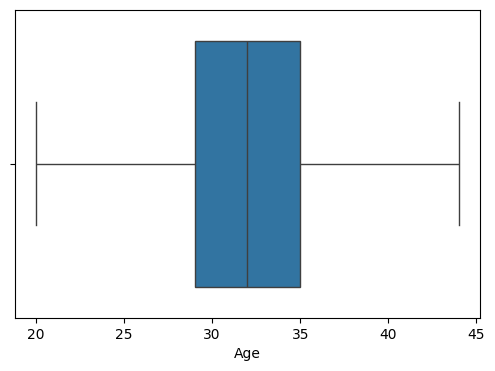

In [ ]:
# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=users)

* We can conclude that the Outliers has been handeled smoothly and now data don't have any outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

* We used IQR method to fill the right side outliers with maximum value and Left side outliers with the minimum value.

## **7. Popularity Based Approach**

* The main idea behind Popularity Based Approach is to recomend the books which are popular, the popularity can be calculated on the basis of ratings.

In [ ]:
def popularity_approach(df,number_of_top_book=50):
    # first we have groupy with Title and Rating as we would recomend popularity on the these columns
    rating_counts=df.groupby("Book-Title").count()["Rating"].reset_index()
    # counting the number of ratings that particular Title has got
    rating_counts.rename(columns={"Rating":"num_of_ratings"},inplace=True)

    # calculating average rating
    rating_avg=df.groupby("Book-Title")["Rating"].mean().reset_index()
    rating_avg.rename(columns={"Rating":"average_rating"},inplace=True)

    df_popular_books=rating_counts.merge(rating_avg,on="Book-Title")

    # average rating can be misguiding as they may be biased to number of ratings
    # so taking account of number of ratings for particular title
    # therefore  creating a function for calculating meaningfull average rating
    mean_avg_rating=df_popular_books["average_rating"].mean()
    total_ratings=df_popular_books["num_of_ratings"].quantile(0.90)
    def weighted_rate(df):
        number_of_rating_vector=df["num_of_ratings"]
        average_rating_vector=df["average_rating"]

        return ((number_of_rating_vector*average_rating_vector) + (total_ratings*mean_avg_rating)) / (number_of_rating_vector+total_ratings)


    # checking only for books which got more than
    df_popular_books=df_popular_books[df_popular_books["num_of_ratings"] >=100]
    # calculating popularity of books using weighted_rate
    df_popular_books["popularity"]=df_popular_books.apply(weighted_rate,axis=1)
    # sorting the books by its popularity in decending order
    df_popular_books=df_popular_books.sort_values(by="popularity",ascending=False)
    # returning the top n books
    return df_popular_books[["Book-Title","num_of_ratings","average_rating","popularity"]].reset_index(drop=True).head(number_of_top_book)

In [ ]:
# top 20 popular books
top_20=pd.DataFrame(popularity_approach(books_ratings_df,20))
top_20

,Book-Title,num_of_ratings,average_rating,popularity
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,5.805129
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.772160
2,The Little Prince,141,5.815603,5.677236
3,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.667477
4,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,5.449805
5,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,5.340746
6,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,5.154940
7,The Perks of Being a Wallflower,104,5.144231,5.002081
8,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,4.955663
9,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,4.909949


## **8. Collaborative Filtering Approaches**

In Collaborative Filtering we make predictions of the taste or the interests of the user based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 have similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books.

Collaborative Filtering has mainly two implimentaion strategies
 *   Model Based
 *   Memory Based

we will use following approaches
  *  User_based Collaborative Filtering and
  *  Item_based Collaborative Filtering


 Content Based Filtering


*  Model based Collaborative Filtering Approach
   * Singular value decomposition(SVD)
   * Non-Negetive Matrix Factorisation(NMF)

### **User Based Collaborative Filtering**

*  In this technique we try to predict on basis of what user may like based on the ratings that they had given to the items. In simple words here we try to identify the neighbouring users on the basis of similarity of active users and then scoring of the items is calculated on the basis of those neighbour users.

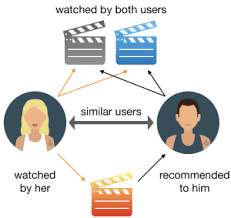

In [ ]:
# Drop users who have given less number of votings
# we will drop the users where the number of votes are less than 100
new_df=books_ratings_df[books_ratings_df['user_id'].map(books_ratings_df['user_id'].value_counts()) > 100]

# creating a pivot tables consisting user related information
users_info=new_df.pivot_table(index=["user_id"],columns=["Book-Title"],values="Rating")
users_info.fillna(0,inplace=True)

In [ ]:
users_info.head()

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Always Have Popsicles,Apple Magic (The Collector's series),Beyond IBM: Leadership Marketing and Finance for the 1990s,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),Dark Justice,Deceived,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),Flight of Fancy: American Heiresses (Zebra Ballad Romance),...,Ã?ngeles fugaces (Falling Angels),Ã?Â?. Kolumnen.,Ã?Â?ber das Fernsehen.,Ã?Â?ber die Freiheit.,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,Ã?Â?berraschung am Valentinstag.,Ã?Â?lpiraten.,Ã?Â?rger mit Produkt X. Roman.,Ã?Â?stlich der Berge.,Ã?Â?thique en toc
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def choice_of_users(id):

    user_favourite=new_df[new_df["user_id"]==id].sort_values(["Rating"],ascending=False)[0:10]
    return user_favourite

def user_based_collaborative(new_df,user_id):
    if user_id not in new_df["user_id"].values:
        print("USER NOT FOUND")


    else:
        user_index=np.where(users_info.index==user_id)[0][0]
        similar=cosine_similarity(users_info)
        similar_users_list=list(enumerate(similar[user_index]))
        similar_users_list = sorted(similar_users_list,key = lambda x:x[1],reverse=True)[0:10]

        record_of_users=[]

        for ind in similar_users_list:
                data=books_ratings_df[books_ratings_df["user_id"]==users_info.index[ind[0]]]
                record_of_users.extend(list(data.drop_duplicates("user_id")["user_id"].values))

    return record_of_users

def common(df,users_list,user_id):
    temp1=new_df[df["user_id"]==user_id]
    suggested_books=[]
    users_list=list(users_list)
    for id in users_list:
        temp2=df[(df["user_id"]==id)]
        all_books=temp2.loc[~temp2["Book-Title"].isin(temp1["Book-Title"]),:]
        all_books=all_books.sort_values(["Rating"],ascending=False)[0:10]
        suggested_books.extend(all_books["Book-Title"].values)

    return suggested_books[0:10]


In [ ]:
# taking any random user_id
import random
random_user_id=random.choice(new_df["user_id"].values)
# showing users choice based on history
user_choice=pd.DataFrame(choice_of_users(random_user_id))
# subseting users favourite from users choice
user_favorite=choice_of_users(random_user_id)
n=len(user_choice["Book-Title"].values)
print(f"USER: {random_user_id} ")

USER: 150896 


In [ ]:
user_favorite

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user_id,Rating
172065,0061043508,Strong Poison,Dorothy L. Sayers,1995,HarperTorch,http://images.amazon.com/images/P/0061043508.0...,http://images.amazon.com/images/P/0061043508.0...,http://images.amazon.com/images/P/0061043508.0...,150896,10
702633,1853261394,Anne of Green Gables (Wordsworth Classics),L.M. Montgomery,1999,NTC/Contemporary Publishing Company,http://images.amazon.com/images/P/1853261394.0...,http://images.amazon.com/images/P/1853261394.0...,http://images.amazon.com/images/P/1853261394.0...,150896,10
139009,0553213148,Anne of Avonlea (Anne of Green Gables Novels (...,L.M. MONTGOMERY,1984,Bantam Classics,http://images.amazon.com/images/P/0553213148.0...,http://images.amazon.com/images/P/0553213148.0...,http://images.amazon.com/images/P/0553213148.0...,150896,10
734821,0060915439,Holy the Firm,Annie Dillard,1988,Perennial,http://images.amazon.com/images/P/0060915439.0...,http://images.amazon.com/images/P/0060915439.0...,http://images.amazon.com/images/P/0060915439.0...,150896,10
72479,0451187903,Sense and Sensibility,Jane Austen,1995,Signet Book,http://images.amazon.com/images/P/0451187903.0...,http://images.amazon.com/images/P/0451187903.0...,http://images.amazon.com/images/P/0451187903.0...,150896,10
76292,0345339703,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,150896,10
997462,0380627035,Parnassus on Wheels,Christopher Morley,1983,Harpercollins,http://images.amazon.com/images/P/0380627035.0...,http://images.amazon.com/images/P/0380627035.0...,http://images.amazon.com/images/P/0380627035.0...,150896,10
986598,1566198593,Adventures of Sherlock Holmes,Arthur Conan Doyle,2002,Barnes Noble Classics,http://images.amazon.com/images/P/1566198593.0...,http://images.amazon.com/images/P/1566198593.0...,http://images.amazon.com/images/P/1566198593.0...,150896,9
19157,0451526279,Emma (Signet Classics (Paperback)),Jane Austen,1996,Signet Classics,http://images.amazon.com/images/P/0451526279.0...,http://images.amazon.com/images/P/0451526279.0...,http://images.amazon.com/images/P/0451526279.0...,150896,9
172056,0553247379,The Mother Hunt (Rex Stout Library),Rex Stout,1993,Bantam,http://images.amazon.com/images/P/0553247379.0...,http://images.amazon.com/images/P/0553247379.0...,http://images.amazon.com/images/P/0553247379.0...,150896,9


In [ ]:
# getting user based data for particular random user id
user_based=user_based_collaborative(new_df,random_user_id)
# getting recomended books for that particular random user id
book_suggesions_user=common(new_df,user_based,random_user_id)
# ceating a dataframe to store the results
book_suggesions_user=pd.DataFrame(book_suggesions_user,columns=["Book-Title"])
book_suggesions_user

,Book-Title
0,Anne of the Island
1,"The Two Towers (The Lord of the Rings, Part 2)"
2,Halloween Party
3,The Story Girl (Classic)
4,Death in the Clouds
5,Anne of Ingleside (Anne of Green Gables Novels...
6,The Silmarillion
7,The Kitchen God's Wife
8,Feast of All Saints
9,Dead Man's Folly


### **Item Based Collaborative Filtering**

*  In Item based collaborative filtering we try to find similar items based on the items which user has liked or interacted with .It suggests an item based on items the user has previously consumed. It looks for the items the user has consumed then it finds other items similar to consumed items and recommends accordingly

In [ ]:
def item_based_approach(data,querry_bookTitle,number_of_suggesions):
    querry_bookTitle=str(querry_bookTitle)

    if querry_bookTitle in data["Book-Title"].values:
        count_rating=pd.DataFrame(data["Book-Title"].value_counts())
        # seperating rare books
        rare=count_rating[count_rating["Book-Title"]<=100].index
        # defining common books
        # as those books which are not rare are common books
        common_b=data[~data["Book-Title"].isin(rare)]

        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books
            ran5=pd.Series(common_b["Book-Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            common_b_pivot=common_b.pivot_table(index=["user_id"],columns=["Book-Title"],values="Rating")
            # defining title as t
            t=common_b_pivot[querry_bookTitle]
            # making suggesions based on the correlation
            suggesion_df=pd.DataFrame(common_b_pivot.corrwith(t).sort_values(ascending=False)).reset_index(drop=False)

            if querry_bookTitle in [ele for ele in suggesion_df["Book-Title"]]:
                suggesion_df=suggesion_df.drop(suggesion_df[suggesion_df["Book-Title"]==querry_bookTitle].index[0])

            less_rating=[]
            for ele in suggesion_df["Book-Title"]:
                if data[data["Book-Title"]==ele]["Rating"].mean() < 5:
                    less_rating.append(ele)
            if suggesion_df.shape[0] - len(less_rating) > 5:
                suggesion_df=suggesion_df[~suggesion_df["Book-Title"].isin(less_rating)]

            suggesion_df=suggesion_df[0:number_of_suggesions]
            suggesion_df.columns=["Book-Title","Correlation"]

            return suggesion_df

    else:
        print("No Results Found  !!!")

In [ ]:
# getting top 10 suggesions from item-based approach
item_based_approach(books_ratings_df,"The Da Vinci Code",10)

,Book-Title,Correlation
40,The Perks of Being a Wallflower,0.477725
127,Ender's Game (Ender Wiggins Saga (Paperback)),0.347085
270,The Hobbit : The Enchanting Prelude to The Lor...,0.228288
276,Harry Potter and the Sorcerer's Stone (Book 1),0.223224
280,Harry Potter and the Chamber of Secrets (Book 2),0.221635
369,Harry Potter and the Goblet of Fire (Book 4),0.169938
379,The Little Prince,0.162574
527,Harry Potter and the Order of the Phoenix (Boo...,0.080607
723,Harry Potter and the Prisoner of Azkaban (Book 3),-0.041449


In [ ]:
# when the book title is not present
item_based_approach(books_ratings_df,"machine learning",10)

No Results Found  !!!


## **9. Content based Filtering**

In Content based Filtering approach we recomend item to the users based on the content we have about the history of users. We recomend similar books based what other books that particular user has read.In simple words based on what we like ,the algorithm will simply pick the items with similar content to recomend us.

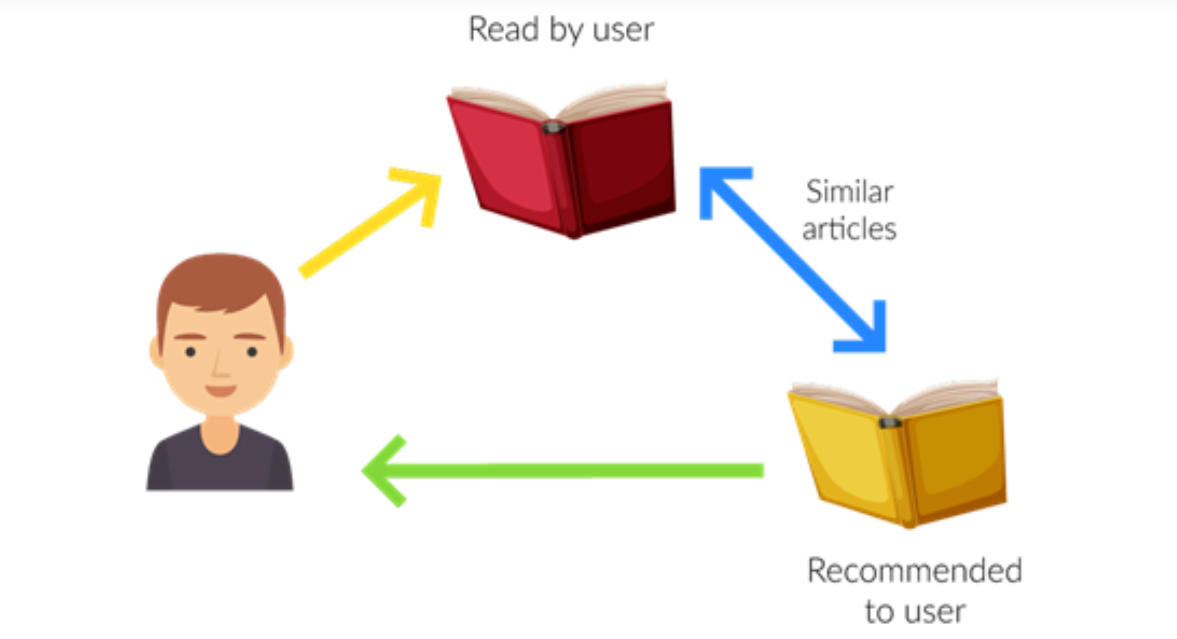

In [ ]:
def content_based_approach(data,querry_bookTitle,number_of_books):
    querry_bookTitle=str(querry_bookTitle)

    if querry_bookTitle in data["Book-Title"].values:
        count_rating=pd.DataFrame(data["Book-Title"].value_counts())
        # seperating rare books
        rare=count_rating[count_rating["Book-Title"]<=100].index
        # defining common books
        # as those books which are not rare are common books
        common_b=data[~data["Book-Title"].isin(rare)]

        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books
            ran5=pd.Series(common_b["Book-Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            #first we drop the dulplicates Book Title
            common_b=common_b.drop_duplicates(subset=["Book-Title"])
            common_b.reset_index(inplace=True)
            # setting the index to length of unique common books
            common_b["index"]=[ele for ele in range(common_b.shape[0])]
            # taking content based title, Author and publisher
            list_of_targets=["Book-Title","Book-Author","Publisher"]
            common_b["all_features"] = [" ".join(common_b[list_of_targets].iloc[ele,].values) for ele in range(common_b[list_of_targets].shape[0])]
            # transforming into vectorized form
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_b["all_features"])
            # finding similarity based on title, Author and publisher
            similar=cosine_similarity(common_booksVector)
            index=common_b[common_b["Book-Title"]==querry_bookTitle]["index"].values[0]
            similar_books_list=list(enumerate(similar[index]))
            similar_books_sorted=sorted(similar_books_list,key=lambda ele:ele[1],reverse=True)[1:number_of_books+1]
            suggested_books=[]
            for ele in range(len(similar_books_sorted)):

                suggested_books.append(common_b[common_b["index"]==similar_books_sorted[ele][0]]["Book-Title"].item())
            return suggested_books
    else:
        print(" COULD NOT FIND THE CONTENT")

In [ ]:
content_based_approach(books_ratings_df,'The Da Vinci Code',10)

['The Catcher in the Rye',
 'The Brethren',
 'Deception Point',
 'The Alibi',
 'The Firm',
 'The Client',
 'The Chamber',
 'The Partner',
 'The Last Juror',
 'The Curious Incident of the Dog in the Night-Time (Today Show Book Club #13)']

## ***10. Model Based Approach***

**Singular Value Decomposition (SVD)**, is a popular method in field of Data Science and Machine Learning .It is a classical method from the Linear Algebra concept. It is popular beacuse of its properties and its use in Recomendation System. We can use this in recomending Books, movies etc.

SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in ML problems. It is a matrix Factorisation technique which tries to reduce the number of feature or attributes by reducing the sapce dimension from N dimension to I dimension.SVD is used as a collaborative filtering technique in recomendation technique domain. It consist of a matrix structure where the rows define the users and columns defines the item.


**Non- Negetive Matrix Factorisation(NMF) :** Our goal in NMF is to approximate the users-item V matrix by the dot product of two arrays W and H. Dimensions of the arrays are defined by dimensions of V and number of components we set to the algorithm. If V has n rows and m columns and we want to decompose it to k components, then W has n rows, and k columns and H has k rows and m columns.This is actually matrix factorization part of the algorithm. The Non-negative part refers to V, W, and H — all the values have to be equal or greater than zero, i.e., non-negative.

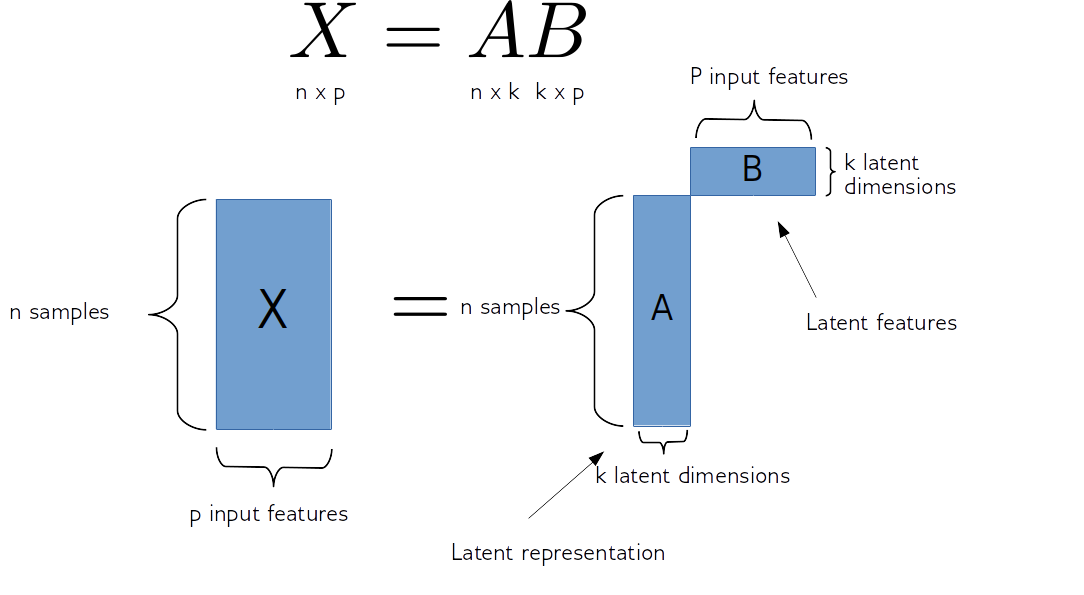

## ***11. ML Model Implementation***

In [ ]:
pip install surprise

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
# considering valid ratings only
raw_ratings=ratings[ratings['Rating'] != 0]
df_merge=pd.merge(users, ratings, on="user_id")
df_merge=pd.merge(df_merge,books, on="ISBN")

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  1031136 non-null  float64
 3   Country              1031136 non-null  object 
 4   ISBN                 1031136 non-null  object 
 5   Rating               1031136 non-null  int64  
 6   Book-Title           1031136 non-null  object 
 7   Book-Author          1031136 non-null  object 
 8   Year-Of-Publication  1031136 non-null  int64  
 9   Publisher            1031136 non-null  object 
 10  Image-URL-S          1031136 non-null  object 
 11  Image-URL-M          1031136 non-null  object 
 12  Image-URL-L          1031136 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 110.1+ MB


In [ ]:
df_merge.isnull().sum()

user_id                0
Location               0
Age                    0
Country                0
ISBN                   0
Rating                 0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_merge[['user_id', 'ISBN', 'Rating']], reader)
# Fit the Algorithm
svd_default = SVD()
results_svd = cross_validate(svd_default, data, cv=3)
pd.DataFrame(results_svd).mean()
# Predict on the model

test_rmse     3.498132
test_mae      2.928747
fit_time     26.720860
test_time     4.119165
dtype: float64

In [ ]:
#implimentation of NMF
nmf = NMF()
results_nmf = cross_validate(nmf, data, cv=3)
pd.DataFrame(results_nmf).mean()

test_rmse     3.879476
test_mae      3.146765
fit_time     52.931497
test_time     3.942204
dtype: float64

#### 2. Cross- Validation & Hyperparameter Tuning

* **As SVD model is working good with default parameters so, we would try hypertunning on SVD model only**

Hyperparameter tunning is a process where we tune our model that is we try to find the model parameters which would give best results
* Here we have use GridSearchCV which check the results for all possible combination from the parameter grid

* we will try to find the model parameters
            'n_factors'- number of factors
            'n_epochs'- number of epochs i.e number of iteration of the SVD procedure
            'lr_all'- learning rate
            'reg_all- the regularisation term for all parameters

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_factors': [60,50],
              'n_epochs': [6, 16],
              'lr_all': [0.01, 0.001],
              'reg_all': [0.1, 0.9]}

opt_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
opt_svd.fit(data)

print(opt_svd.best_score['rmse'])
print(opt_svd.best_params['rmse'])

3.4351092979221556
{'n_factors': 50, 'n_epochs': 6, 'lr_all': 0.01, 'reg_all': 0.1}


**Hypertunning SVD model**

In [ ]:
# Spliting the dataset in train teat and predict
train, test = train_test_split(data, test_size=0.2)
best_params=opt_svd.best_params['rmse']
optimized_svd = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
optimized_svd.fit(train)
pred = optimized_svd.test(test)

In [ ]:
results_svd = cross_validate(optimized_svd, data, cv=3)
pd.DataFrame(results_svd).mean()

test_rmse    3.435518
test_mae     2.911263
fit_time     5.835003
test_time    4.678606
dtype: float64

In [ ]:
# To see predictions
df_pred = pd.DataFrame(pred, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(10)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
133272,240568,0440103304,0.0,3.619207,False,4.0,3.619207
171123,64220,0345423135,5.0,3.648062,False,4.0,1.351938
18614,193337,067088796X,8.0,1.121304,False,1.0,6.878696
137075,76352,0373271867,0.0,1.000000,False,1.0,1.000000
28148,59034,0306813092,0.0,3.154166,False,3.0,3.154166
196017,110267,0345340744,8.0,2.317709,False,2.0,5.682291
55458,192158,0385335482,0.0,5.555161,False,6.0,5.555161
42608,129074,1559701269,0.0,2.483120,False,2.0,2.483120
82962,105374,2070408450,0.0,1.311930,False,1.0,1.311930
134412,137434,0886777631,10.0,5.356774,False,5.0,4.643226


##### Which hyperparameter optimization technique have you used and why?

*  GridSearchCV , As we have to check results for all possible combination of parameters from the param grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* yes , the test_rmse has been reduced by 0.01.

*   List item
*   List item



# **CONCLUSION:**

**From EDA part**

* Maximum numbers of books are published in year 2002.

* Agatha Christie has written maximum no. of books and is more than 600.

* Maximum no. of books are published by Harlequin publisher.

* Maximum no. of users are from USA.

* Most frequent rating recieved by a book is 8.

* The Book "Harry Potter and the Prisoner of Azkaban(Book 3)" has maximum Average rating and Number of rating are more 400.

* Author Bill Watterson has maximum average rating.

* Five Star (ME) publisher has maximum average rating(approx 8).

**From Modelling part**

SVD model works better than NMF model for book reccomendation as it has lower RMSE and MAE score.

### ***Hurrah! You have successfully completed my Machine Learning Capstone Project !!!***